In [1]:
import pandas as pd
import numpy as np

In [2]:
# tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
# tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')

In [3]:
# tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [4]:
# tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [5]:
# df = pd.concat([tmp, tmp_2])

In [6]:
# X = df.loc[:, df.columns!='Personality (Class label)']

In [7]:
# y = df.loc[:, df.columns=='Personality (Class label)']

In [8]:
# male_df = df[df['Gender'] == 'Male']

In [9]:
# female_df = df[df['Gender'] == 'Female']

In [10]:
# # getting all the columns
# cols = set(male_df.columns)
 
# # removing the desired column
# cols.remove('Personality (Class label)')
# cols.remove('Gender')
# cols = list(cols)
# X_male = male_df[cols]
# y_male = male_df.loc[:, male_df.columns=='Personality (Class label)']

In [11]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
#                                                     stratify=y_male, 
#                                                     test_size=0.30)

In [12]:
from sklearn.model_selection import train_test_split

def df_load_and_split(gender='male'):
    tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    df = pd.concat([tmp, tmp_2])
    if gender == 'male':
        df = df[df['Gender'] == 'Male']
    else:
        df = df[df['Gender'] == 'Female']
    cols = set(df.columns)
    cols.remove('Personality (Class label)')
    cols.remove('Gender')
    cols = list(cols)
    X = df[cols]
    y = df.loc[:, df.columns=='Personality (Class label)']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.30)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = df_load_and_split('male')

In [13]:
print(len(X_train))
print(len(y_train))

222
222


In [14]:
y_train

,Personality (Class label)
243,serious
280,responsible
293,serious
300,serious
246,serious
...,...
201,serious
157,serious
216,extraverted
9,serious


In [15]:
tmp = X_train 
tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

tmp_2 = X_test 
tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

print(len(tmp))
print(len(tmp_2))
tmp = pd.concat([tmp, tmp_2])
tmp

222
96


,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness,Personality (Class label)
243,24,8,4,5,7,5,serious
280,19,3,2,4,2,6,responsible
293,19,5,6,4,4,6,serious
300,17,8,3,6,1,7,serious
246,18,7,5,6,5,5,serious
...,...,...,...,...,...,...,...
251,20,4,7,4,5,3,responsible
125,19,5,2,7,6,1,serious
209,18,6,3,8,7,6,serious
141,19,6,5,5,6,5,serious


In [16]:
class_counts = tmp['Personality (Class label)'].value_counts()
min_class = class_counts.idxmin()
min_count = class_counts.min()

balanced_df = pd.concat([
    tmp[tmp['Personality (Class label)'] == min_class],
    tmp[tmp['Personality (Class label)'] != min_class].sample(min_count)
], axis=0)

balanced_df

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness,Personality (Class label)
134,19,4,7,6,4,7,dependable
215,18,6,6,6,6,3,dependable
162,23,6,3,4,6,2,dependable
27,22,4,8,6,6,2,dependable
219,21,5,7,6,4,7,dependable
215,18,6,6,6,6,3,dependable
311,18,7,5,2,3,8,dependable
263,22,4,2,6,4,2,dependable
90,24,6,4,4,5,4,dependable
134,19,4,7,6,4,7,dependable


In [17]:
# tmp = X_train 
# # tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

# tmp_2 = X_test 
# # tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

tmp_X = pd.concat([X_train, X_test])
tmp_y = pd.concat([y_train['Personality (Class label)'], y_test['Personality (Class label)']])

print(len(tmp_X))
print(len(tmp_y))

318
318


In [18]:
tmp_y

243        serious
280    responsible
293        serious
300        serious
246        serious
          ...     
251    responsible
125        serious
209        serious
141        serious
68         serious
Name: Personality (Class label), Length: 318, dtype: object

In [19]:
print(tmp_y.shape)
print(type(tmp_y))
tmp_y = tmp_y.to_frame()
tmp_y

(318,)
<class 'pandas.core.series.Series'>


,Personality (Class label)
243,serious
280,responsible
293,serious
300,serious
246,serious
...,...
251,responsible
125,serious
209,serious
141,serious


In [20]:
print(tmp_y.iloc[0])
print(tmp_y.iloc[1])

Personality (Class label)    serious
Name: 243, dtype: object
Personality (Class label)    responsible
Name: 280, dtype: object


In [21]:
# tmp_y

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(tmp_y).toarray())  # y_train works, need to convert temp_y to y_train
# final_df = df.join(encoder_df)
encoder_df.columns = encoder.categories_

encoder_df

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
313,0.0,0.0,0.0,1.0,0.0
314,0.0,0.0,0.0,0.0,1.0
315,0.0,0.0,0.0,0.0,1.0
316,0.0,0.0,0.0,0.0,1.0


In [23]:
tmp_y_enc = encoder_df
tmp_y_enc

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
313,0.0,0.0,0.0,1.0,0.0
314,0.0,0.0,0.0,0.0,1.0
315,0.0,0.0,0.0,0.0,1.0
316,0.0,0.0,0.0,0.0,1.0


In [24]:
# help(sm.fit_resample)
tmp_X.columns

Index(['Age', 'extraversion', 'neuroticism', 'openness', 'agreeableness',
       'conscientiousness', 'Personality (Class label)'],
      dtype='object')

In [25]:
# np.ravel(tmp_y_enc)
# tmp_X
# type(tmp_X)
tmp_X = tmp_X.drop('Personality (Class label)', axis=1)
tmp_X

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness
243,24,8,4,5,7,5
280,19,3,2,4,2,6
293,19,5,6,4,4,6
300,17,8,3,6,1,7
246,18,7,5,6,5,5
...,...,...,...,...,...,...
251,20,4,7,4,5,3
125,19,5,2,7,6,1
209,18,6,3,8,7,6
141,19,6,5,5,6,5


In [26]:
print(len(tmp_X))
print(len(tmp_y_enc)*5)

318
1590


In [27]:
# tmp = X_train 
# # tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

# tmp_2 = X_test 
# # tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

tmp_X = pd.concat([X_train, X_test])
tmp_y = pd.concat([y_train['Personality (Class label)'], y_test['Personality (Class label)']])

print(len(tmp_X))
print(len(tmp_y))

318
318


In [28]:
tmp_y = tmp_X['Personality (Class label)']
tmp_y = pd.DataFrame({'Personality (Class label)': tmp_y})
type(tmp_y)
tmp_y

,Personality (Class label)
243,serious
280,responsible
293,serious
300,serious
246,serious
...,...
251,responsible
125,serious
209,serious
141,serious


In [29]:
# np.array(tmp_y.values.tolist())

In [30]:
# Eita lage nai eikhane
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the column you want to encode
encoder.fit(tmp_y)

# Transform the column
# df['A'] = 
encoder.transform(tmp_y)[:10]

# View the resulting dataframe
# print(df)

array([[4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [1.]])

In [31]:
encoder.inverse_transform(encoder.transform(tmp_y)[:10])

array([['serious'],
       ['responsible'],
       ['serious'],
       ['serious'],
       ['serious'],
       ['serious'],
       ['lively'],
       ['serious'],
       ['serious'],
       ['extraverted']], dtype=object)

In [32]:
tmp_X = tmp_X.drop('Personality (Class label)', axis=1)

In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(tmp_X, np.ravel(tmp_y))

df_res = pd.DataFrame(X_res)
df_res['Personality'] = y_res

df_res

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness,Personality
0,24,8,4,5,7,5,serious
1,19,3,2,4,2,6,responsible
2,19,5,6,4,4,6,serious
3,17,8,3,6,1,7,serious
4,18,7,5,6,5,5,serious
...,...,...,...,...,...,...,...
1015,18,2,4,3,4,4,responsible
1016,22,6,3,3,4,4,responsible
1017,18,1,4,3,3,4,responsible
1018,17,5,5,5,5,4,responsible


In [34]:
df_res['Personality'].value_counts()

serious        204
responsible    204
lively         204
extraverted    204
dependable     204
Name: Personality, dtype: int64

In [35]:
tmp_X = df_res.drop('Personality', axis=1)
tmp_X

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness
0,24,8,4,5,7,5
1,19,3,2,4,2,6
2,19,5,6,4,4,6
3,17,8,3,6,1,7
4,18,7,5,6,5,5
...,...,...,...,...,...,...
1015,18,2,4,3,4,4
1016,22,6,3,3,4,4
1017,18,1,4,3,3,4
1018,17,5,5,5,5,4


In [36]:
tmp_y = df_res['Personality']
tmp_y = pd.DataFrame({'Personality': tmp_y})
type(tmp_y)
tmp_y

,Personality
0,serious
1,responsible
2,serious
3,serious
4,serious
...,...
1015,responsible
1016,responsible
1017,responsible
1018,responsible


In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(tmp_y).toarray())  # y_train works, need to convert temp_y to y_train
# final_df = df.join(encoder_df)
encoder_df.columns = encoder.categories_

encoder_df

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1015,0.0,0.0,0.0,1.0,0.0
1016,0.0,0.0,0.0,1.0,0.0
1017,0.0,0.0,0.0,1.0,0.0
1018,0.0,0.0,0.0,1.0,0.0


In [38]:
tmp_y_enc = encoder_df
tmp_y_enc

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1015,0.0,0.0,0.0,1.0,0.0
1016,0.0,0.0,0.0,1.0,0.0
1017,0.0,0.0,0.0,1.0,0.0
1018,0.0,0.0,0.0,1.0,0.0


In [39]:
encoder.inverse_transform(tmp_y_enc)

array([['serious'],
       ['responsible'],
       ['serious'],
       ...,
       ['responsible'],
       ['responsible'],
       ['responsible']], dtype=object)

In [40]:
# This is for deep learning - one hot encoded y values
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y_enc,
                                                        stratify=tmp_y_enc, 
                                                        test_size=0.30)

In [41]:
X_train

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness
321,18,4,5,5,6,3
837,17,1,5,7,5,7
278,20,4,1,6,4,6
407,22,4,2,5,4,2
265,27,4,5,4,4,7
...,...,...,...,...,...,...
789,22,3,5,7,2,7
190,19,4,5,5,7,7
744,18,3,1,5,6,6
898,18,2,2,4,2,6


In [42]:
y_train

,dependable,extraverted,lively,responsible,serious
321,1.0,0.0,0.0,0.0,0.0
837,0.0,0.0,1.0,0.0,0.0
278,0.0,0.0,1.0,0.0,0.0
407,1.0,0.0,0.0,0.0,0.0
265,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
789,0.0,0.0,1.0,0.0,0.0
190,0.0,0.0,0.0,0.0,1.0
744,0.0,0.0,1.0,0.0,0.0
898,0.0,0.0,0.0,1.0,0.0


In [43]:
# This is for deep learning - one hot encoded y values
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y,
                                                        stratify=tmp_y, 
                                                        test_size=0.30)

In [44]:
X_train

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness
321,18,4,5,5,6,3
332,19,4,7,6,4,7
13,23,3,6,6,6,3
633,19,5,6,7,3,4
274,23,6,7,5,3,1
...,...,...,...,...,...,...
355,18,4,4,6,3,7
309,19,3,6,6,1,5
256,17,6,1,5,7,5
423,22,4,2,5,4,2


In [45]:
y_train

,Personality
321,dependable
332,dependable
13,extraverted
633,extraverted
274,extraverted
...,...
355,dependable
309,extraverted
256,serious
423,dependable


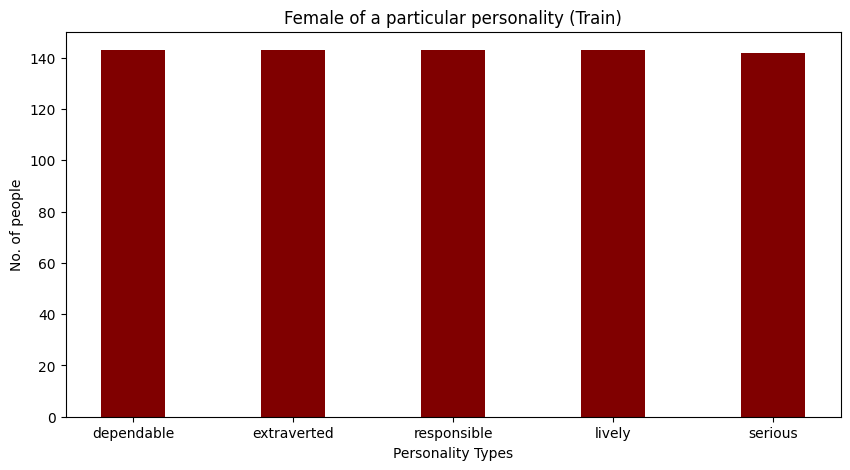

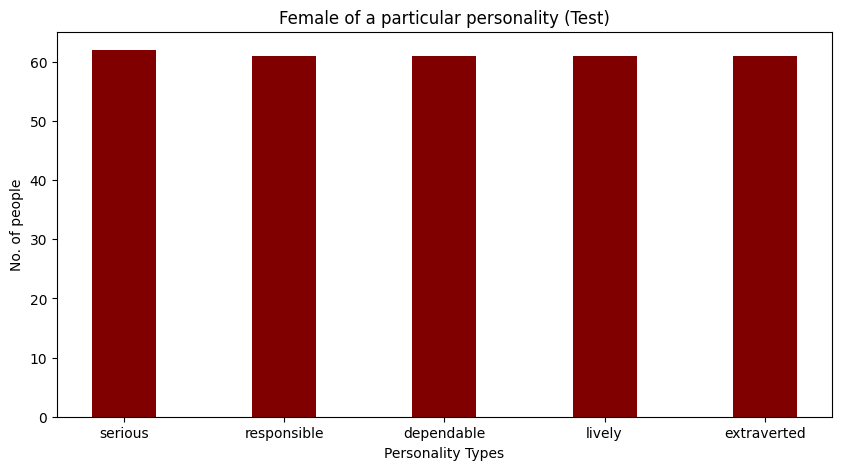

In [46]:
def draw_bars(X_train, X_test, y_train, y_test, gender='male'):
    import matplotlib.pyplot as plt
    for i in y_train, y_test:
        tmp = i.value_counts() # .count()
        fig = plt.figure(figsize = (10, 5))
        # creating the bar plot
        plt.bar(list(i['Personality'].value_counts()._get_axis(axis=0)),
                list(i['Personality'].value_counts()), color ='maroon',
                width = 0.4)

        plt.xlabel("Personality Types")
        plt.ylabel("No. of people")

        if len(i) == len(y_train):
            tmp = gender.title() + " of a particular personality (Train)"
            plt.title(tmp)
        else:
            tmp = gender.title() + " of a particular personality (Test)"
            plt.title(tmp)

        plt.show()
        
draw_bars(X_train, X_test, y_train, y_test, 'female')

In [47]:
X_train

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness
321,18,4,5,5,6,3
332,19,4,7,6,4,7
13,23,3,6,6,6,3
633,19,5,6,7,3,4
274,23,6,7,5,3,1
...,...,...,...,...,...,...
355,18,4,4,6,3,7
309,19,3,6,6,1,5
256,17,6,1,5,7,5
423,22,4,2,5,4,2


In [48]:
y_train

,Personality
321,dependable
332,dependable
13,extraverted
633,extraverted
274,extraverted
...,...
355,dependable
309,extraverted
256,serious
423,dependable


In [49]:
y_train.iloc[0]

Personality    dependable
Name: 321, dtype: object

In [50]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

one_hot_encode(y_train)

,dependable,extraverted,lively,responsible,serious
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
709,1.0,0.0,0.0,0.0,0.0
710,0.0,1.0,0.0,0.0,0.0
711,0.0,0.0,0.0,0.0,1.0
712,1.0,0.0,0.0,0.0,0.0


In [51]:
def get_val(row, data):
    tmp = []
    for i in one_hot_encode(data).columns:
        tmp.append(str(i[0]))
    for i in range(len(row)):
        if row[i]==1:
            return tmp[i]
            
get_val([0, 0, 0, 1.0, 0], y_test)

'responsible'

In [52]:
y_train

,Personality
321,dependable
332,dependable
13,extraverted
633,extraverted
274,extraverted
...,...
355,dependable
309,extraverted
256,serious
423,dependable


In [53]:
# y_train = one_hot_encode(y_train)

In [54]:
# y_test = one_hot_encode(y_test)

In [55]:
# # X = X_train + X_test
# X = pd.concat([X_train, X_test])
# # y = y_train + y_test
# y = pd.concat([y_train, y_test])

# X.isna().sum()

In [56]:
# y['Personality (Class label)']

In [57]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y_train)

In [58]:
# X_train   # I am now here 

In [59]:
# # X = X_train + X_test
# X = pd.concat([X_train, X_test])
# # y = y_train + y_test
# y = pd.concat([y_train, y_test])

In [60]:
print(len(X_train))
print(len(X_test))
print(len(pd.concat([X_train, X_test])))

714
306
1020


In [61]:
print(len(y_train))
print(len(y_test))
print(len(pd.concat([y_train, y_test])))

714
306
1020


In [62]:
# y_train
# y_pred
type(y_train)

pandas.core.frame.DataFrame

In [63]:
X_train

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness
321,18,4,5,5,6,3
332,19,4,7,6,4,7
13,23,3,6,6,6,3
633,19,5,6,7,3,4
274,23,6,7,5,3,1
...,...,...,...,...,...,...
355,18,4,4,6,3,7
309,19,3,6,6,1,5
256,17,6,1,5,7,5
423,22,4,2,5,4,2


In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras

# y = pd.concat([y_train, y_test])

# Convert y_train to numerical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

2023-05-05 13:23:27.749804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 13:23:29.164764: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-05 13:23:29.164911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-05 13:23:29.164923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [65]:
print(len(y_train_encoded))
print(len(y_test_encoded))

714
306


In [66]:

# Split the data into training and validation sets
# x_train, x_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=(6,)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model on the test set
# y_test_encoded = le.transform(y_test)
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

2023-05-05 13:23:30.555264: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-05-05 13:23:30.555298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Scarlet
2023-05-05 13:23:30.555309: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Scarlet
2023-05-05 13:23:30.555460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.108.3
2023-05-05 13:23:30.555491: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.105.17
2023-05-05 13:23:30.555502: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 525.105.17 does not match DSO version 510.108.3 -- cannot find working devices in this configuration
2023-05-05 13:

Epoch 1/10
23/23 [==============================] - 2s 22ms/step - loss: 0.0000e+00 - accuracy: 0.2045 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 2/10
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 3/10
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 4/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 5/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 6/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - v

In [67]:
model.evaluate(X_test, y_test_encoded)

10/10 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1993


[0.0, 0.1993464082479477]

In [68]:
X_test

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness
228,24,6,7,4,3,7
936,19,4,6,4,5,3
165,24,6,4,4,5,4
260,21,4,6,5,1,5
775,22,3,4,5,5,7
...,...,...,...,...,...,...
1010,19,3,2,4,2,6
748,17,1,4,6,6,6
533,23,3,7,6,2,4
903,18,1,4,4,2,5


In [69]:
# Chat GPT
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of features in your input data
n_features = X_train.shape[1]

# Define the number of classes in your output
n_classes = len(y_train['Personality'].unique())

print(n_classes)
print(n_features)

5
6


In [70]:
# Define your model
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
# Convert the 'Personality' column to category type
y_train_categorized = y_train['Personality'].astype('category')
y_test_categorized = y_test['Personality'].astype('category')

In [72]:
# y_train
len(y_test_categorized.cat.categories)

5

In [73]:
y_test_categorized

228         serious
936     responsible
165      dependable
260         serious
775          lively
           ...     
1010    responsible
748          lively
533     extraverted
903     responsible
72          serious
Name: Personality, Length: 306, dtype: category
Categories (5, object): ['dependable', 'extraverted', 'lively', 'responsible', 'serious']

In [74]:
y_test_categorized.cat.codes

228     4
936     3
165     0
260     4
775     2
       ..
1010    3
748     2
533     1
903     3
72      4
Length: 306, dtype: int8

In [75]:
# Convert your labels to one-hot encoding
y_train_categorized_en = tf.keras.utils.to_categorical(y_train_categorized.cat.codes, num_classes=n_classes)
y_test_categorized_en = tf.keras.utils.to_categorical(y_test_categorized.cat.codes, num_classes=n_classes)

print(len(y_train_categorized_en))
print(len(y_test_categorized_en))
print(y_train_categorized_en[0])

714
306
[1. 0. 0. 0. 0.]


In [76]:
# Train the model
model.fit(X_train, y_train_categorized_en, epochs=100, batch_size=32, validation_split=0.1, 
          verbose=0)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_categorized_en, batch_size=32)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

10/10 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8627
Test loss: 0.3990696668624878
Test accuracy: 0.8627451062202454


In [77]:
# Create a Pandas DataFrame with a single row for your input data
tmp_data = pd.DataFrame([[1, 2, 3, 4, 5, 6]], columns=['openness', 'Age', 'extraversion', 'conscientiousness', 'agreeableness', 'neuroticism'])

In [78]:
# Get the predicted probabilities for each category
probas = model.predict(tmp_data)

# Print the predicted probabilities
print(probas)

1/1 [==============================] - 0s 117ms/step
[[2.5083436e-02 2.5651429e-06 2.4600754e-02 1.0244733e-03 9.4928879e-01]]


In [79]:
# Get the index of the category with the highest probability
pred_idx = probas.argmax()

# Get the category name from the index
categories = y_train_categorized.cat.categories
pred_category = categories[pred_idx]

# Print the predicted category
print(pred_category)

serious


In [80]:
# 
y_train["Personality"][862]

'responsible'

In [81]:
# Create a Pandas DataFrame with a single row for your input data
tmp_data = pd.DataFrame([[3, 18, 2, 4, 4, 4]], columns=['openness', 'Age', 'extraversion', 'conscientiousness', 'agreeableness', 'neuroticism'])

# Get the predicted probabilities for each category
probas = model.predict(tmp_data)

# Print the predicted probabilities
print(probas)

# Get the index of the category with the highest probability
pred_idx = probas.argmax()

# Get the category name from the index
categories = y_train_categorized.cat.categories
pred_category = categories[pred_idx]

# Print the predicted category
print(pred_category)

1/1 [==============================] - 0s 31ms/step
[[1.8363232e-09 7.0532587e-16 2.7305280e-18 5.5568241e-02 9.4443172e-01]]
serious


In [82]:
# y_train

In [83]:
# Bard Chat
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_en = le.fit_transform(y_train)
y_test_en = le.transform(y_test)


# Encode the categorical data
# classes = set(y_train)
# num_classes = len(classes)

# y_train_en_cat = tf.keras.utils.to_categorical(y_train_en)
# y_test_en_cat = tf.keras.utils.to_categorical(y_test_en)

# y_train_en_cat = tf.keras.utils.to_categorical(y_train_en.astype('category'))
# y_test_en_cat = tf.keras.utils.to_categorical(y_test_en.astype('category'))

y_train_en_cat = tf.keras.utils.to_categorical(y_train_en.astype('str'))
y_test_en_cat = tf.keras.utils.to_categorical(y_test_en.astype('str'))

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [84]:
# # Bard Failed
# # Create the model
# model = keras.Sequential([
#   keras.layers.Dense(128, activation='relu'),
#   keras.layers.Dense(64, activation='relu'),
#   keras.layers.Dense(5, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train_en, epochs=10)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test_en)
# print('Loss:', loss)
# print('Accuracy:', accuracy)

# # Save the model
# # model.save('personality_model.h5')

In [85]:
# Bing Chat

In [86]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the label encoder on the training data
le.fit(y_train['Personality'])

# Transform the training and test data
y_train_en = le.transform(y_train['Personality'])
y_test_en = le.transform(y_test['Personality'])

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#

In [88]:
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
18/18 [==============================] - 1s 16ms/step - loss: 1.5175 - accuracy: 0.3450 - val_loss: 1.3230 - val_accuracy: 0.5175
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 1.3201 - accuracy: 0.4746 - val_loss: 1.3200 - val_accuracy: 0.5455
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2406 - accuracy: 0.5219 - val_loss: 1.3573 - val_accuracy: 0.4825
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2209 - accuracy: 0.5271 - val_loss: 1.1699 - val_accuracy: 0.5944
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 1.1711 - accuracy: 0.5447 - val_loss: 1.1836 - val_accuracy: 0.5594
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1563 - accuracy: 0.5604 - val_loss: 1.1376 - val_accuracy: 0.6084
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1359 - accuracy: 0.5587 - val_loss: 1.1652 - val_accuracy: 0.5734
Epoch 8/10
18/18 [=

In [89]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

# Print classification report and confusion matrix
print(classification_report(y_test_cat, y_pred_cat))
print(confusion_matrix(y_test_cat, y_pred_cat))

10/10 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

  dependable       0.33      0.02      0.03        61
 extraverted       0.68      0.79      0.73        61
      lively       0.81      0.79      0.80        61
 responsible       0.31      0.57      0.40        61
     serious       0.58      0.56      0.57        62

    accuracy                           0.55       306
   macro avg       0.54      0.55      0.51       306
weighted avg       0.54      0.55      0.51       306

[[ 1 14  1 33 12]
 [ 0 48  0 13  0]
 [ 0  0 48 13  0]
 [ 0  6  7 35 13]
 [ 2  3  3 19 35]]


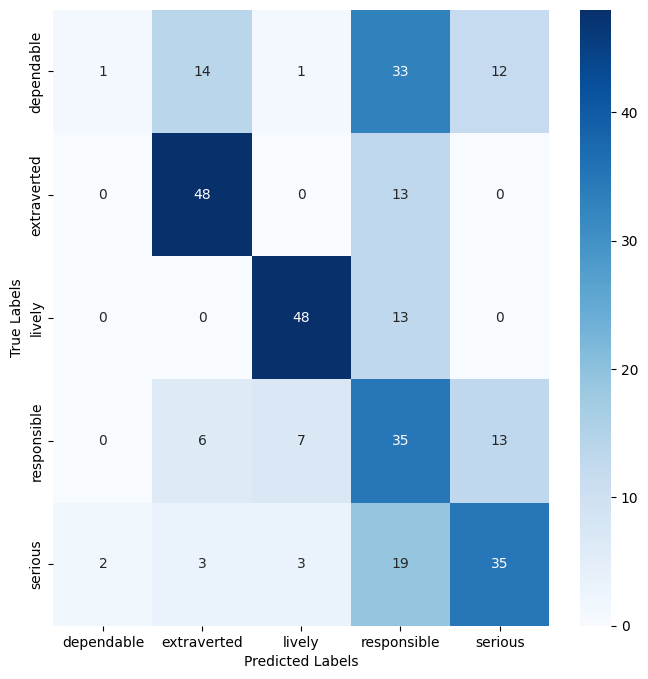

In [90]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create the confusion matrix
# conf_mat = confusion_matrix(y_test_cat, y_pred_cat)

# # Plot the confusion matrix
# plt.figure(figsize=(8,8))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [91]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_cat = np.argmax(y_pred, axis=1)

# Convert the encoded test labels back to original labels
y_test_orig = le.inverse_transform(y_test_en)

# Convert the predicted labels back to original labels
y_pred_orig = le.inverse_transform(y_pred_cat)

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test_orig, y_pred_orig, average='weighted')
recall = recall_score(y_test_orig, y_pred_orig, average='weighted')
f1 = f1_score(y_test_orig, y_pred_orig, average='weighted')
accuracy = accuracy_score(y_test_orig, y_pred_orig)

# Print the evaluation metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

10/10 [==============================] - 0s 2ms/step
Precision: 0.543334511678172
Recall: 0.545751633986928
F1-score: 0.5071368847728663
Accuracy: 0.545751633986928


In [92]:
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Get the model's predicted labels for the test set
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# y_pred = model.predict_classes(X_test)

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test_en, y_pred)

# Print precision, recall, and F1-score for each class
for i, class_name in enumerate(le.classes_):
    print(f"Metrics for {class_name}:")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-score: {f1[i]:.2f}\n")

# Calculate micro-averaged precision, recall, and F1-score
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='micro')

# Print micro-averaged precision, recall, and F1-score
print("Micro-averaged metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1:.2f}\n")

# Calculate macro-averaged precision, recall, and F1-score
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='macro')

# Print macro-averaged precision, recall, and F1-score
print("Macro-averaged metrics:")
print(f"Precision: {macro_precision:.2f}")
print(f"Recall: {macro_recall:.2f}")
print(f"F1-score: {macro_f1:.2f}\n")


10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision: 0.33
Recall: 0.02
F1-score: 0.03

Metrics for extraverted:
Precision: 0.68
Recall: 0.79
F1-score: 0.73

Metrics for lively:
Precision: 0.81
Recall: 0.79
F1-score: 0.80

Metrics for responsible:
Precision: 0.31
Recall: 0.57
F1-score: 0.40

Metrics for serious:
Precision: 0.58
Recall: 0.56
F1-score: 0.57

Micro-averaged metrics:
Precision: 0.55
Recall: 0.55
F1-score: 0.55

Macro-averaged metrics:
Precision: 0.54
Recall: 0.55
F1-score: 0.51



In [93]:
from sklearn.metrics import cohen_kappa_score

y_pred = model.predict(X_test).argmax(axis=-1)
kappa = cohen_kappa_score(y_test_en, y_pred)
print("Cohen's kappa:", kappa)

10/10 [==============================] - 0s 1ms/step
Cohen's kappa: 0.4321986383660392


In [94]:
from sklearn.metrics import matthews_corrcoef

y_pred = model.predict(X_test).argmax(axis=-1)
mcc = matthews_corrcoef(y_test_en, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

10/10 [==============================] - 0s 1ms/step
Matthews Correlation Coefficient (MCC): 0.4511977889898538


In [95]:
import numpy as np

k = 3  # Top-K value
y_pred = model.predict(X_test)
top_k = np.sum(np.argsort(y_pred, axis=1)[:, -k:] == y_test_en.reshape(-1, 1), axis=1)
top_k_acc = np.mean(top_k)
print(f"Top-{k} Accuracy: {top_k_acc:.2f}")

10/10 [==============================] - 0s 2ms/step
Top-3 Accuracy: 0.91


In [96]:
len(y_test_encoded)

306

In [97]:
X_test.shape

(306, 6)

In [98]:
y_test_encoded.shape

(306,)

In [99]:
X_train

,Age,extraversion,neuroticism,openness,agreeableness,conscientiousness
321,18,4,5,5,6,3
332,19,4,7,6,4,7
13,23,3,6,6,6,3
633,19,5,6,7,3,4
274,23,6,7,5,3,1
...,...,...,...,...,...,...
355,18,4,4,6,3,7
309,19,3,6,6,1,5
256,17,6,1,5,7,5
423,22,4,2,5,4,2


In [100]:
type(X_train)

pandas.core.frame.DataFrame

In [101]:
type(y_train)

pandas.core.frame.DataFrame

In [102]:
y_train['Personality'].unique()

array(['dependable', 'extraverted', 'responsible', 'lively', 'serious'],
      dtype=object)

In [103]:
714 + 306

1020

10/10 [==============================] - 0s 2ms/step


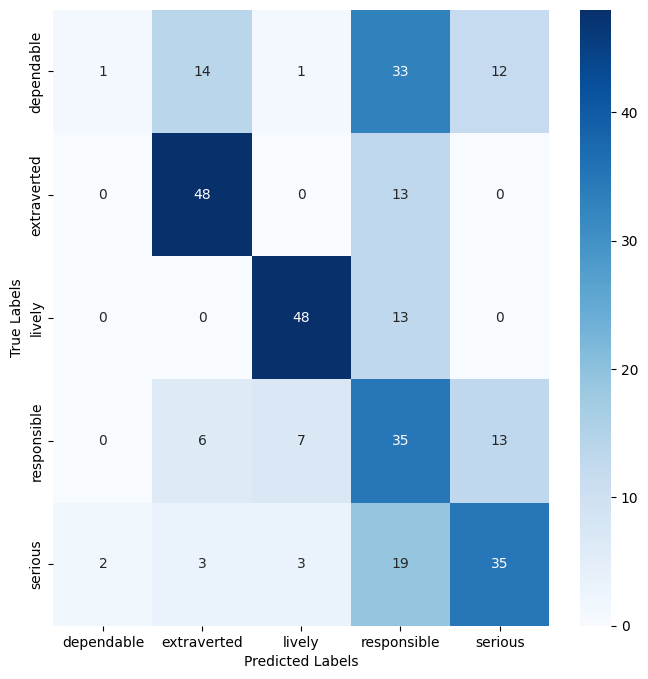

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


def classification_report_plot(X_test, y_train, y_test):
    # Create a label encoder
    le = LabelEncoder()
    #
    # Fit the label encoder on the training data
    le.fit(y_train['Personality'])
    #
    # Transform the training and test data
    y_train_en = le.transform(y_train['Personality'])
    y_test_en = le.transform(y_test['Personality']) 
    #
    # Predict labels for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    #
    # Convert integer labels back to categorical labels
    y_test_cat = le.inverse_transform(y_test_en)
    y_pred_cat = le.inverse_transform(y_pred_classes)
    # Create the confusion matrix
    conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)
    # Plot the confusion matrix
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
classification_report_plot(X_test, y_train, y_test)

In [127]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
import numpy as np

def cprint(text, color=''):
    if color=='r':
        print("\033[91m", str(text), "\033[0m", sep='')
    elif color=='g':
        print("\033[92m", str(text), "\033[0m", sep='')
    elif color=='y':
        print("\033[93m", str(text), "\033[0m", sep='')
    elif color=='b':
        print("\033[94m", str(text), "\033[0m", sep='')
    else:
        print(str(text))


def evaluation_matrices(model, X_test, y_pred, y_test_en):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_cat = np.argmax(y_pred, axis=1)
    #
    # Convert the encoded test labels back to original labels
    y_test_orig = le.inverse_transform(y_test_en)
    #
    # Convert the predicted labels back to original labels
    y_pred_orig = le.inverse_transform(y_pred_cat)
    #
    # Calculate precision, recall, F1-score, and accuracy
    precision = precision_score(y_test_orig, y_pred_orig, average='weighted')
    recall = recall_score(y_test_orig, y_pred_orig, average='weighted')
    f1 = f1_score(y_test_orig, y_pred_orig, average='weighted')
    accuracy = accuracy_score(y_test_orig, y_pred_orig)
    #
    # Print the evaluation metrics
    tmp = round(precision, 1)
    text = 'Precision (0[-] to 1[+]):' + str(precision)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    #
    tmp = round(recall, 1)
    text = 'Recall (0[-] to 1[+]):' + str(recall)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    # print('Recall (0[-] to 1[+]):', recall)
    tmp = round(f1, 1)
    text = 'F1 (0[-] to 1[+]):' + str(f1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    # print('F1-score (0[-] to 1[+]):', f1)
    tmp = round(accuracy, 1)
    text = 'Accuracy (0[-] to 1[+]):' + str(accuracy)
    if tmp > 0.5: 
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    # print('Accuracy (0[-] to 1[+]):', accuracy)
    #
    # Get the model's predicted labels for the test set
    predict_x=model.predict(X_test) 
    y_pred=np.argmax(predict_x,axis=1)
    #
    # y_pred = model.predict_classes(X_test)
    #
    # Calculate precision, recall, and F1-score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_en, y_pred)
    #
    # Print precision, recall, and F1-score for each class
    for i, class_name in enumerate(le.classes_):
        print(f"Metrics for {class_name}:")
        # print(f"Precision (0[-] to 1[+]): {precision[i]:.2f}")
        # print(f"Recall (0[-] to 1[+]): {recall[i]:.2f}")
        # print(f"F1-score (0[-] to 1[+]): {f1[i]:.2f}\n") 
        #
        tmp = round(precision[i], 1)
        text = f"Precision (0[-] to 1[+]): {precision[i]:.2f}"
        if tmp > 0.5: 
            cprint(text, color='g')
        elif tmp < 0.5:
            cprint(text, color='r')
        elif tmp == 0.5:
            cprint(text, color='b')
        else:
            cprint(text)      
        #    
        tmp = round(recall[i], 1)
        text = f"Recall (0[-] to 1[+]): {recall[i]:.2f}"
        if tmp > 0.5: 
            cprint(text, color='g')
        elif tmp < 0.5:
            cprint(text, color='r')
        elif tmp == 0.5:
            cprint(text, color='b')
        else:
            cprint(text)   
        #    
        tmp = round(f1[i], 1)
        text = f"F1-score (0[-] to 1[+]): {f1[i]:.2f}\n"
        if tmp > 0.5: 
            cprint(text, color='g')
        elif tmp < 0.5:
            cprint(text, color='r')
        elif tmp == 0.5:
            cprint(text, color='b')
        else:
            cprint(text)
        #
    # Calculate micro-averaged precision, recall, and F1-score
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='micro')
    #
    # Print micro-averaged precision, recall, and F1-score
    print("Micro-averaged metrics:")
    text = f"Micro Precision (0[-] to 1[+]): {micro_precision:.2f}"
    #
    tmp = round(micro_precision, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)     
    #    
    text = f"Micro Recall (0[-] to 1[+]): {micro_recall:.2f}"
    #
    tmp = round(micro_recall, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)    
    #    
    text = f"Micro F1-score (0[-] to 1[+]): {micro_f1:.2f}\n"
    #
    tmp = round(micro_f1, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    #    
    # print(f"Precision (0[-] to 1[+]): {micro_precision:.2f}")
    # print(f"Recall (0[-] to 1[+]): {micro_recall:.2f}")
    # print(f"F1-score (0[-] to 1[+]): {micro_f1:.2f}\n")
    #
    # Calculate macro-averaged precision, recall, and F1-score
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='macro')
    #
    # Print macro-averaged precision, recall, and F1-score
    print("Macro-averaged metrics:")
    #
    text = f"Macro Precision (0[-] to 1[+]): {macro_precision:.2f}"
    #
    tmp = round(macro_precision, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
        
        
    text = f"Macro Recall (0[-] to 1[+]): {macro_recall:.2f}"

    tmp = round(macro_recall, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)      
    #    
    text = f"Macro F1-score (0[-] to 1[+]): {macro_f1:.2f}\n"
    #
    tmp = round(macro_f1, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)  
    # print(f"Precision (0[-] to 1[+]): {macro_precision:.2f}")
    # print(f"Recall (0[-] to 1[+]): {macro_recall:.2f}")
    # print(f"F1-score (0[-] to 1[+]): {macro_f1:.2f}\n")
    #
    y_pred = model.predict(X_test).argmax(axis=-1)
    kappa = cohen_kappa_score(y_test_en, y_pred)
    # print("Cohen's kappa (-1[-Corr] to 0[RCorr] to +1[+Corr]):", kappa)
    #
    text = "Cohen's kappa (-1[-Corr] to 0[RCorr] to +1[+Corr]):" + str(kappa)
    #
    tmp = round(kappa, 1)
    if tmp > 0:
        cprint(text, color='g')
    elif tmp < 0:
        cprint(text, color='r')
    elif tmp == 0:
        cprint(text, color='b')
    else:
        cprint(text)
    #
    y_pred = model.predict(X_test).argmax(axis=-1)
    mcc = matthews_corrcoef(y_test_en, y_pred)
    # print("Matthews Correlation Coefficient (MCC) (-1[-Corr] to 0[RCorr] to +1[+Corr]):", mcc)
    #
    text = "Matthews Correlation Coefficient (MCC) (-1[-Corr] to 0[RCorr] to +1[+Corr]):" + str(mcc)
    #
    tmp = round(mcc, 1)
    if tmp > 0:
        cprint(text, color='g')
    elif tmp < 0:
        cprint(text, color='r')
    elif tmp == 0:
        cprint(text, color='b')
    else:
        cprint(text)
    #
    k = 3  # Top-K value
    y_pred = model.predict(X_test)
    top_k = np.sum(np.argsort(y_pred, axis=1)[:, -k:] == y_test_en.reshape(-1, 1), axis=1)
    top_k_acc = np.mean(top_k)
    # print(f"Top-{k} Accuracy (0[-] to 1[+]): {top_k_acc:.2f}")
    
    text = f"Top-{k} Accuracy (0[-] to 1[+]): {top_k_acc:.2f}"
    tmp = round(top_k_acc, 1)
    if tmp > 0:
        cprint(text, color='g')
    elif tmp < 0:
        cprint(text, color='r')
    elif tmp == 0:
        cprint(text, color='b')
    else:
        cprint(text)
    


evaluation_matrices(model, X_test, y_pred, y_test_en)

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.543334511678172
Recall (0[-] to 1[+]):0.545751633986928
F1 (0[-] to 1[+]):0.5071368847728663
Accuracy (0[-] to 1[+]):0.545751633986928
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.33
Recall (0[-] to 1[+]): 0.02
F1-score (0[-] to 1[+]): 0.03

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.68
Recall (0[-] to 1[+]): 0.79
F1-score (0[-] to 1[+]): 0.73

Metrics for lively:
Precision (0[-] to 1[+]): 0.81
Recall (0[-] to 1[+]): 0.79
F1-score (0[-] to 1[+]): 0.80

Metrics for responsible:
Precision (0[-] to 1[+]): 0.31
Recall (0[-] to 1[+]): 0.57
F1-score (0[-] to 1[+]): 0.40

Metrics for serious:
Precision (0[-] to 1[+]): 0.58
Recall (0[-] to 1[+]): 0.56
F1-score (0[-] to 1[+]): 0.57

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.55
Micro Recall (0[-] to 1[+]): 0.55
Micro F1-score (0[-] to 1[+]): 0.55

Macro-averaged metrics:
Macro Preci

In [122]:
print("\033[91m" + "Red text" + "\033[0m")

def cprint(text, color=''):
    if color=='r':
        print("\033[91m", str(text), "\033[0m", sep='')
    elif color=='g':
        print("\033[92m", str(text), "\033[0m", sep='')
    elif color=='y':
        print("\033[93m", str(text), "\033[0m", sep='')
    elif color=='b':
        print("\033[94m", str(text), "\033[0m", sep='')
    else:
        print(str(text))
cprint(123, 'r')
cprint(123, 'g')
cprint(123, 'y')
cprint(123, 'b')
cprint(123)

my_float = 3.14159
rounded_float = round(my_float, 1)
print(rounded_float)


Red text
123
123
123
123
123
3.1


In [ ]:
# In this example, \033[91m sets the color to red, and \033[0m resets the color back to the default.

# Here are some of the most commonly %set_enved color codes:

# Red: \033[91m
# Green: \033[92m
# Yellow: \033[93m
# Blue: \033[94m
# Purple: \033[95m
# Cyan: \033[96m
# You can also change the background color by using the following codes:

# Red: \033[101m
# Green: \033[102m
# Yellow: \033[103m
# Blue: \033[104m
# Purple: \033[105m
# Cyan: \033[106m
# To reset the color back to the default, use \033[0m.

# Note that not all terminal emulators support ANSI escape codes, so this method may not work on all systems.

In [123]:
f"Precision (0[-] to 1[+]): {1.256:.2f}"

'Precision (0[-] to 1[+]): 1.26'

In [132]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the label encoder on the training data
le.fit(y_train['Personality'])

# Transform the training and test data
y_train_en = le.transform(y_train['Personality'])
y_test_en = le.transform(y_test['Personality'])


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
18/18 [==============================] - 1s 16ms/step - loss: 2.1368 - accuracy: 0.2137 - val_loss: 1.6096 - val_accuracy: 0.2238
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 1.5083 - accuracy: 0.3187 - val_loss: 1.4031 - val_accuracy: 0.4336
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 1.3738 - accuracy: 0.4273 - val_loss: 1.3516 - val_accuracy: 0.4406
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2873 - accuracy: 0.4816 - val_loss: 1.3059 - val_accuracy: 0.4266
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2189 - accuracy: 0.5499 - val_loss: 1.2137 - val_accuracy: 0.4685
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2062 - accuracy: 0.5271 - val_loss: 1.1694 - val_accuracy: 0.5664
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1585 - accuracy: 0.5587 - val_loss: 1.1590 - val_accuracy: 0.5315
Epoch 8/10
18/18 [=

10/10 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.33      0.02      0.03        61
 extraverted       0.68      0.79      0.73        61
      lively       0.81      0.79      0.80        61
 responsible       0.31      0.57      0.40        61
     serious       0.58      0.56      0.57        62

    accuracy                           0.55       306
   macro avg       0.54      0.55      0.51       306
weighted avg       0.54      0.55      0.51       306



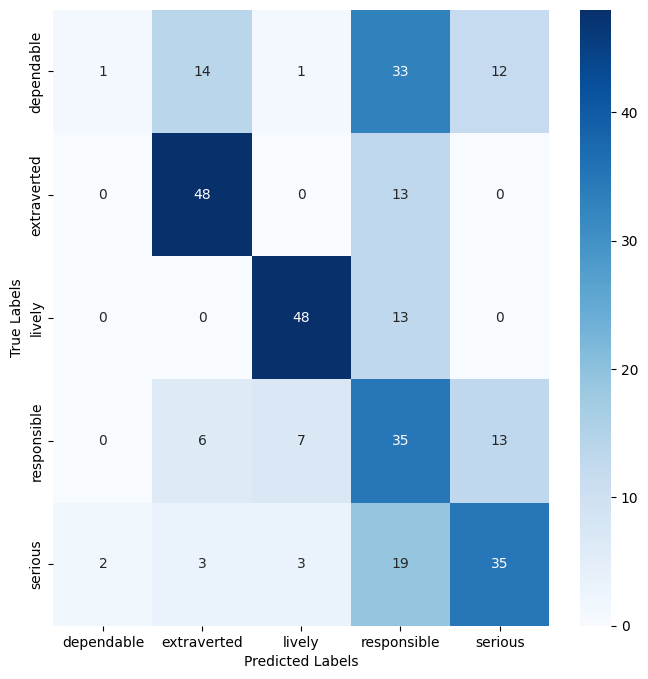

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.543334511678172
Recall (0[-] to 1[+]):0.545751633986928
F1 (0[-] to 1[+]):0.5071368847728663
Accuracy (0[-] to 1[+]):0.545751633986928
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.33
Recall (0[-] to 1[+]): 0.02
F1-score (0[-] to 1[+]): 0.03

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.68
Recall (0[-] to 1[+]): 0.79
F1-score (0[-] to 1[+]): 0.73

Metrics for lively:
Precision (0[-] to 1[+]): 0.81
Recall (0[-] to 1[+]): 0.79
F1-score (0[-] to 1[+]): 0.80

Metrics for responsible:
Precision (0[-] to 1[+]): 0.31
Recall (0[-] to 1[+]): 0.57
F1-score (0[-] to 1[+]): 0.40

Metrics for serious:
Precision (0[-] to 1[+]): 0.58
Recall (0[-] to 1[+]): 0.56
F1-score (0[-] to 1[+]): 0.57

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.55
Micro Recall (0[-] to 1[+]): 0.55
Micro F1-score (0[-] to 1[+]): 0.55

Macro-averaged metrics:
Macro Preci

In [129]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)

In [130]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
18/18 [==============================] - 2s 19ms/step - loss: 1.5115 - accuracy: 0.3450 - val_loss: 1.4532 - val_accuracy: 0.3427
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 1.3542 - accuracy: 0.4168 - val_loss: 1.2668 - val_accuracy: 0.4545
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2424 - accuracy: 0.4974 - val_loss: 1.2408 - val_accuracy: 0.4895
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1758 - accuracy: 0.5482 - val_loss: 1.2169 - val_accuracy: 0.4685
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1183 - accuracy: 0.5482 - val_loss: 1.0759 - val_accuracy: 0.5804
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 1.0804 - accuracy: 0.5814 - val_loss: 1.1453 - val_accuracy: 0.5245
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 1.0564 - accuracy: 0.5762 - val_loss: 1.0830 - val_accuracy: 0.6014
Epoch 8/10
18/18 [=

10/10 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.56      0.49      0.52        61
 extraverted       0.74      0.66      0.70        61
      lively       0.61      0.97      0.75        61
 responsible       0.86      0.10      0.18        61
     serious       0.45      0.69      0.55        62

    accuracy                           0.58       306
   macro avg       0.64      0.58      0.54       306
weighted avg       0.64      0.58      0.54       306



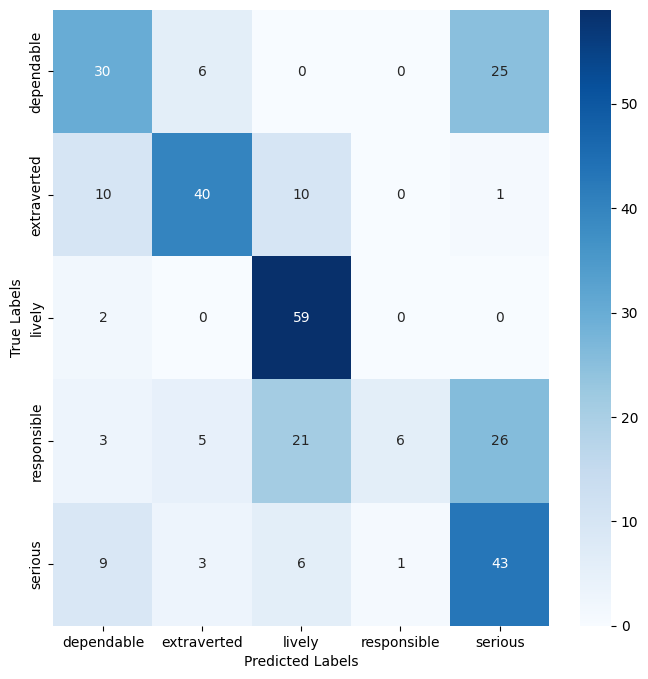

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.6435049986531325
Recall (0[-] to 1[+]):0.5816993464052288
F1 (0[-] to 1[+]):0.538674812565433
Accuracy (0[-] to 1[+]):0.5816993464052288
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.56
Recall (0[-] to 1[+]): 0.49
F1-score (0[-] to 1[+]): 0.52

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.74
Recall (0[-] to 1[+]): 0.66
F1-score (0[-] to 1[+]): 0.70

Metrics for lively:
Precision (0[-] to 1[+]): 0.61
Recall (0[-] to 1[+]): 0.97
F1-score (0[-] to 1[+]): 0.75

Metrics for responsible:
Precision (0[-] to 1[+]): 0.86
Recall (0[-] to 1[+]): 0.10
F1-score (0[-] to 1[+]): 0.18

Metrics for serious:
Precision (0[-] to 1[+]): 0.45
Recall (0[-] to 1[+]): 0.69
F1-score (0[-] to 1[+]): 0.55

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.58
Micro Recall (0[-] to 1[+]): 0.58
Micro F1-score (0[-] to 1[+]): 0.58

Macro-averaged metrics:
Macro Pre

In [131]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)

In [135]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=50,
    validation_split=0.2, 
    verbose=0,
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8529
Test accuracy: 0.8529411554336548


10/10 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.88      0.82      0.85        61
 extraverted       0.79      1.00      0.88        61
      lively       0.95      0.93      0.94        61
 responsible       0.87      0.77      0.82        61
     serious       0.79      0.74      0.77        62

    accuracy                           0.85       306
   macro avg       0.86      0.85      0.85       306
weighted avg       0.86      0.85      0.85       306



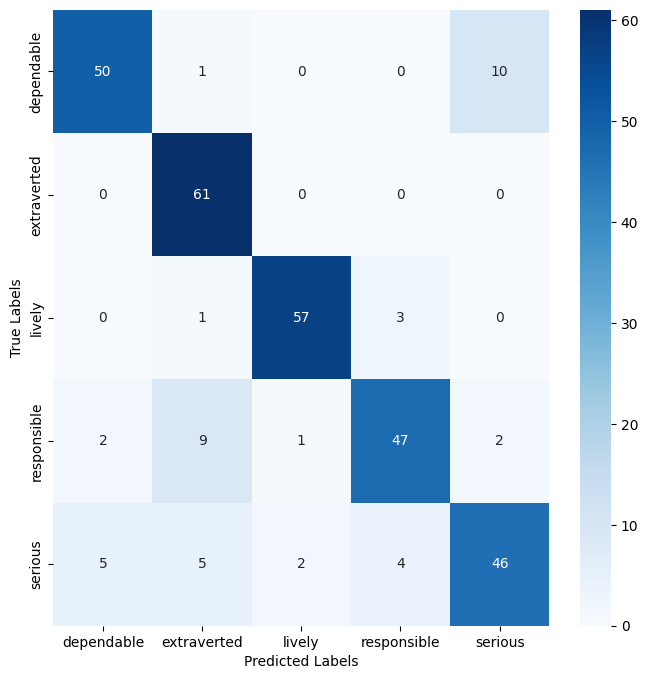

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.8563674955561958
Recall (0[-] to 1[+]):0.8529411764705882
F1 (0[-] to 1[+]):0.8512670874667887
Accuracy (0[-] to 1[+]):0.8529411764705882
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.88
Recall (0[-] to 1[+]): 0.82
F1-score (0[-] to 1[+]): 0.85

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.79
Recall (0[-] to 1[+]): 1.00
F1-score (0[-] to 1[+]): 0.88

Metrics for lively:
Precision (0[-] to 1[+]): 0.95
Recall (0[-] to 1[+]): 0.93
F1-score (0[-] to 1[+]): 0.94

Metrics for responsible:
Precision (0[-] to 1[+]): 0.87
Recall (0[-] to 1[+]): 0.77
F1-score (0[-] to 1[+]): 0.82

Metrics for serious:
Precision (0[-] to 1[+]): 0.79
Recall (0[-] to 1[+]): 0.74
F1-score (0[-] to 1[+]): 0.77

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.85
Micro Recall (0[-] to 1[+]): 0.85
Micro F1-score (0[-] to 1[+]): 0.85

Macro-averaged metrics:
Macro Pr

In [136]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)

In [138]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2, 
    verbose=0,
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 0s 2ms/step - loss: 0.9013 - accuracy: 0.6275
Test accuracy: 0.6274510025978088


10/10 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.76      0.46      0.57        61
 extraverted       0.82      0.52      0.64        61
      lively       0.94      0.79      0.86        61
 responsible       0.38      0.80      0.51        61
     serious       0.71      0.56      0.63        62

    accuracy                           0.63       306
   macro avg       0.72      0.63      0.64       306
weighted avg       0.72      0.63      0.64       306



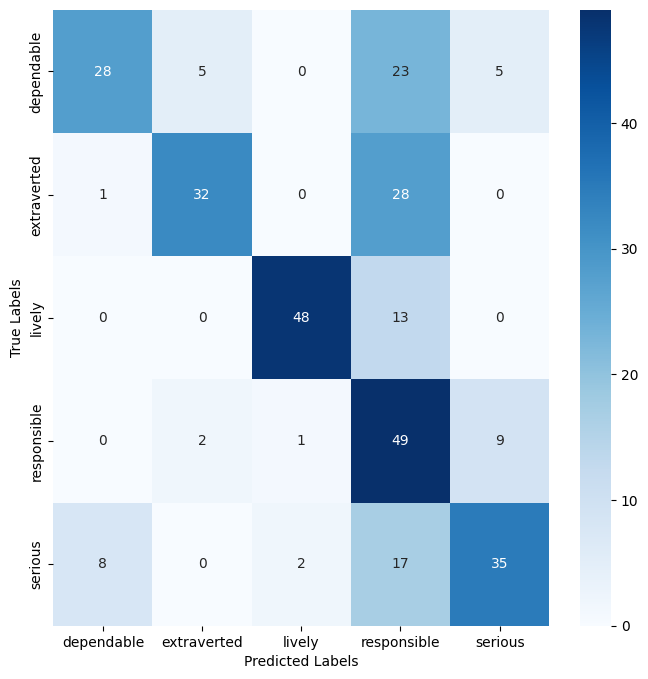

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.7219059833246684
Recall (0[-] to 1[+]):0.6274509803921569
F1 (0[-] to 1[+]):0.6424195606579346
Accuracy (0[-] to 1[+]):0.6274509803921569
10/10 [==============================] - 0s 2ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.76
Recall (0[-] to 1[+]): 0.46
F1-score (0[-] to 1[+]): 0.57

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.82
Recall (0[-] to 1[+]): 0.52
F1-score (0[-] to 1[+]): 0.64

Metrics for lively:
Precision (0[-] to 1[+]): 0.94
Recall (0[-] to 1[+]): 0.79
F1-score (0[-] to 1[+]): 0.86

Metrics for responsible:
Precision (0[-] to 1[+]): 0.38
Recall (0[-] to 1[+]): 0.80
F1-score (0[-] to 1[+]): 0.51

Metrics for serious:
Precision (0[-] to 1[+]): 0.71
Recall (0[-] to 1[+]): 0.56
F1-score (0[-] to 1[+]): 0.63

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.63
Micro Recall (0[-] to 1[+]): 0.63
Micro F1-score (0[-] to 1[+]): 0.63

Macro-averaged metrics:
Macro Pr

In [139]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)

In [140]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=50,
    validation_split=0.2, 
    verbose=0,
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8954
Test accuracy: 0.8954248428344727


10/10 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.82      0.92      0.87        61
 extraverted       0.98      0.90      0.94        61
      lively       0.88      0.98      0.93        61
 responsible       0.91      0.97      0.94        61
     serious       0.90      0.71      0.79        62

    accuracy                           0.90       306
   macro avg       0.90      0.90      0.89       306
weighted avg       0.90      0.90      0.89       306



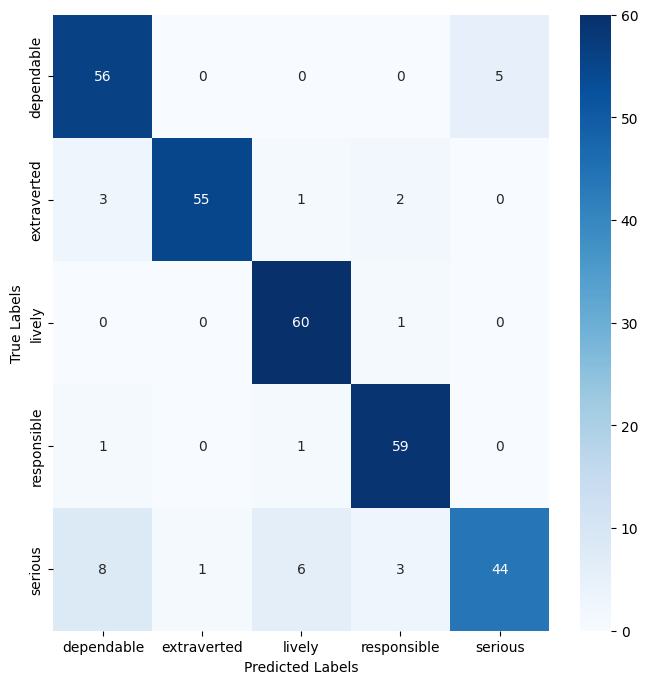

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.8987328038304311
Recall (0[-] to 1[+]):0.8954248366013072
F1 (0[-] to 1[+]):0.8932548725070386
Accuracy (0[-] to 1[+]):0.8954248366013072
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.82
Recall (0[-] to 1[+]): 0.92
F1-score (0[-] to 1[+]): 0.87

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.98
Recall (0[-] to 1[+]): 0.90
F1-score (0[-] to 1[+]): 0.94

Metrics for lively:
Precision (0[-] to 1[+]): 0.88
Recall (0[-] to 1[+]): 0.98
F1-score (0[-] to 1[+]): 0.93

Metrics for responsible:
Precision (0[-] to 1[+]): 0.91
Recall (0[-] to 1[+]): 0.97
F1-score (0[-] to 1[+]): 0.94

Metrics for serious:
Precision (0[-] to 1[+]): 0.90
Recall (0[-] to 1[+]): 0.71
F1-score (0[-] to 1[+]): 0.79

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.90
Micro Recall (0[-] to 1[+]): 0.90
Micro F1-score (0[-] to 1[+]): 0.90

Macro-averaged metrics:
Macro Pr

In [141]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)